In [98]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [99]:
file = "temperature.csv"
data = pd.read_csv(file)

In [100]:
temperature = data.AverageTemperatureFahr
days = data.Days

In [101]:
def plot_data(temperature, days):
    fig = plt.figure()
    plt.plot(days, temperature, 'ro', ms=10, mec='k')
    plt.ylabel("Temperature")
    plt.xlabel("Days")

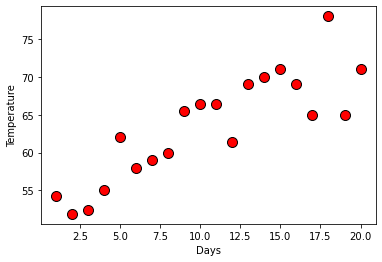

In [102]:
plot_data(temperature, days)

In [103]:
temperature = np.stack([np.ones(days.size), temperature], axis = 1)
def compute_cost_function(temperature, days, theta):
    n = days.size
    cost = 0
    cost = (1 / (2 * n)) * np.sum(np.square(np.dot(temperature, theta) - days))
    return cost

In [104]:
def gradient_descent(temperature, days, theta, alpha, iteration):
    dot_product = np.dot(temperature, theta)
    m = days.shape[0]
    cost_history = []
    theta = theta.copy()

    for i in range(iteration):
        theta = theta - (alpha / m) * (dot_product - days).dot(temperature)
        cost_value = compute_cost_function(temperature, days, theta)
        cost_history.append(cost_value)
    return theta, cost_history

In [105]:
theta = np.zeros(2)
cost = compute_cost_function(temperature, days, theta)
iterations = 1500
alpha = 0.000001

theta, cost_history = gradient_descent(temperature, days, theta, alpha, iterations)

In [106]:
print(cost)
print(cost_history)
print(theta)

71.75
[71.25970326290982, 70.77141194093562, 70.28512603407745, 69.80084554233525, 69.31857046570909, 68.83830080419891, 68.36003655780472, 67.88377772652653, 67.40952431036436, 66.9372763093182, 66.46703372338803, 65.99879655257384, 65.53256479687569, 65.06833845629352, 64.60611753082735, 64.14590202047718, 63.68769192524302, 63.231487245124846, 62.7772879801227, 62.32509413023653, 61.874905695466374, 61.426722675812215, 60.980545071274065, 60.53637288185192, 60.09420610754576, 59.6540447483556, 59.215888804281455, 58.779738275323304, 58.34559316148116, 57.913453462755, 57.483319179144864, 57.05519031065072, 56.62906685727259, 56.204948819010454, 55.7828361958643, 55.362728987834174, 54.94462719492003, 54.5285308171219, 54.114439854439766, 53.70235430687364, 53.29227417442351, 52.88419945708938, 52.47813015487125, 52.074066267769126, 51.672007795783, 51.27195473891288, 50.87390709715876, 50.477864870520634, 50.08382805899852, 49.691796662592395, 49.30177068130229, 48.91375011512817, 4

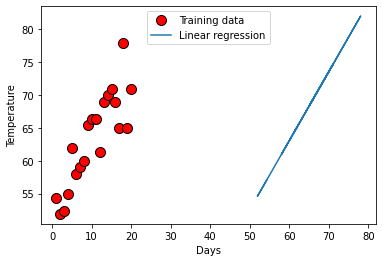

In [107]:
plot_data(temperature[:, 1], days)
plt.plot(temperature[:, 1], np.dot(temperature, theta), '-')
plt.legend(['Training data', 'Linear regression']);